## 주요절차

### 1. 초기데이터 분석

#### 1-1. 데이터딕셔너리(각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼) 확인
#### 1-2 데이터 기초정보 확인 (사이즈, 열이름, 데이터형)

### 2. 데이터 정제

#### 2.1. 원본데이터에서 분석가능한 형태로 데이터 전처리 (형변환, 열이름 변경등)
#### 2.2. 데이터 클리닝: 이상치, 결측치처리

### 3. 추가데이터 분석

#### 3.1 데이터 정제후 데이터딕셔너리 재확인
#### 3.2 기초통계 정보 확인 (최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등)
#### 3.3 시각화를 통한 데이터이해 심화 

* 3.3.1 단일 열: 데이터의 성격에 따른 다양한 차트 적용  
* 3.3.2 복수 열: 두개의 열간 연관관계 분석(Pair Plot 또는 Seaborn의 관련 지원 차트등)

#### 3.4 데이터 분석 결과도출

# 데이터분석 적용 실습 템플릿

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc
from IPython.display import display, HTML
import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [377]:
def display_wide(df1, df2):
    display(HTML(
    f"""
    <div style="display: flex;">
        <div style="margin-right: 20px;">
            {df1.to_html()}
        </div>
        <div>
            {df2.to_html()}
        </div>
    </div>
    """
))

## 데이터 수집

In [378]:
# 데이터 소스를 확보하세요

In [379]:
sle = pd.read_csv('data/전국무인교통단속카메라표준데이터.csv', encoding = 'cp949')
sle

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,...,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명
0,6,경상북도,상주시,일반국도,25번,영남제일로,1,NaN,경상북도 상주시 내서면 낙서리 352-2,36.398710,...,60,NaN,NaN,NaN,NaN,상주경찰서,054-537-0353,2022-06-15,5110000,경상북도 상주시
1,11,전라남도,곡성군,군도,840,창정리,3,NaN,전라남도 곡성군 입면 창정리 165-1,35.305534,...,30,1.0,0.3,2,2020.0,전남지방경찰청,061-362-7000,2022-06-13,4860000,전라남도 곡성군
2,12,전라남도,곡성군,군도,840,읍내리,3,NaN,전라남도 곡성군 곡성읍 읍내리 710-2,35.283373,...,30,1.0,0.3,2,2020.0,전남지방경찰청,061-362-7000,2022-06-13,4860000,전라남도 곡성군
3,13,전라남도,곡성군,군도,840,석곡리,3,NaN,전라남도 곡성군 석곡면 석곡리 8,35.135106,...,30,1.0,0.3,2,2020.0,전남지방경찰청,061-362-7000,2022-06-13,4860000,전라남도 곡성군
4,14,전라남도,곡성군,군도,840,죽림리,3,NaN,전라남도 곡성군 옥과면 죽림리 120-2,35.276399,...,30,1.0,0.3,2,2020.0,전남지방경찰청,061-362-7000,2022-06-13,4860000,전라남도 곡성군
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30880,G1621,경기도,여주시,지방도,333번,여주남로,3,NaN,경기도 여주시 가남읍 본두리 188-7,37.244933,...,50,NaN,NaN,NaN,2018.0,경기남부경찰청,031-888-3952,2022-06-02,5700000,경기도 여주시
30881,G1622,경기도,여주시,지방도,333번,여주남로,3,NaN,경기도 여주시 가남읍 심석리 327-8,37.206880,...,70,NaN,NaN,NaN,2018.0,경기남부경찰청,031-888-3952,2022-06-02,5700000,경기도 여주시
30882,G1624,경기도,여주시,일반국도,3번,경충대로,3,NaN,경기도 여주시 가남읍 은봉리 153,37.180831,...,60,NaN,NaN,NaN,2018.0,경기남부경찰청,031-888-3952,2022-06-02,5700000,경기도 여주시
30883,G1625,경기도,여주시,지방도,333번,설가로,3,NaN,경기도 여주시 가남읍 태평리 504-11,37.199349,...,60,NaN,NaN,NaN,2018.0,경기남부경찰청,031-888-3952,2022-06-02,5700000,경기도 여주시


## 1. 초기데이터 분석

### 1-1. 데이터스키마 확인

#### 각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼을 확인 가능시 진행 하세요
* A열: A열의 의미를 기술
* B열: B열의 의미를 기술  
...

### 1-2. 데이터 기초정보 확인

* 사이즈, 데이터형, 기초통계항목등을 확인하세요  

In [380]:
#df.shape
#df.info()

In [381]:
sle.shape

(30885, 23)

In [382]:
sle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30885 entries, 0 to 30884
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   무인교통단속카메라관리번호  30885 non-null  object 
 1   시도명            30885 non-null  object 
 2   시군구명           30885 non-null  object 
 3   도로종류           30885 non-null  object 
 4   도로노선번호         11905 non-null  object 
 5   도로노선명          30885 non-null  object 
 6   도로노선방향         30764 non-null  object 
 7   소재지도로명주소       21068 non-null  object 
 8   소재지지번주소        28237 non-null  object 
 9   위도             30693 non-null  float64
 10  경도             30689 non-null  float64
 11  설치장소           30885 non-null  object 
 12  단속구분           30874 non-null  object 
 13  제한속도           30885 non-null  int64  
 14  단속구간위치구분       764 non-null    float64
 15  과속단속구간길이       732 non-null    float64
 16  보호구역구분         14135 non-null  object 
 17  설치연도           26245 non-null  float64
 18  관리기관명 

* 기초통계항목

In [383]:
# df.desribe()

In [384]:
sle.describe()

,위도,경도,제한속도,단속구간위치구분,과속단속구간길이,설치연도,제공기관코드
count,30693.000000,30689.000000,30885.000000,764.000000,732.000000,26245.000000,3.088500e+04
mean,36.421970,127.600293,41.140003,1.459424,1262.194932,2018.095256,2.094275e+06
std,1.074031,1.085117,25.841931,0.498677,3420.960703,3.685779,1.330870e+06
min,33.224611,125.936448,0.000000,1.000000,0.000000,2002.000000,1.320000e+06
25%,35.404083,126.895462,30.000000,1.000000,7.100000,2016.000000,1.320000e+06
50%,36.478886,127.167350,50.000000,1.000000,20.000000,2019.000000,1.325472e+06
75%,37.472168,128.474614,60.000000,2.000000,199.000000,2021.000000,3.130000e+06
max,38.862839,238.877694,110.000000,2.000000,15787.000000,2022.000000,6.280000e+06


In [385]:
sle.describe(include='object')

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,설치장소,단속구분,보호구역구분,관리기관명,관리기관전화번호,데이터기준일자,제공기관명
count,30885,30885,30885,30885,11905,30885,30764,21068,28237,30885,30874,14135,30885,30885,30885,30885
unique,22050,17,269,11,948,7185,7,15928,20032,24580,9,6,146,750,89,131
top,1,경기도,고양시,시도,1번,중앙로,3,-,전라남도 광양시 금호동 629-1,주소지 앞 도로변,2,2,경상남도경찰청,031-888-3952,2022-08-19,경찰청
freq,62,5866,750,11697,340,294,14239,105,23,100,13505,9106,2704,2710,11478,11478


In [386]:
value_counts = sle['시도명'].value_counts().sort_index()
districts = value_counts.index.tolist()
values = value_counts.values
districts

['10',
 '강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

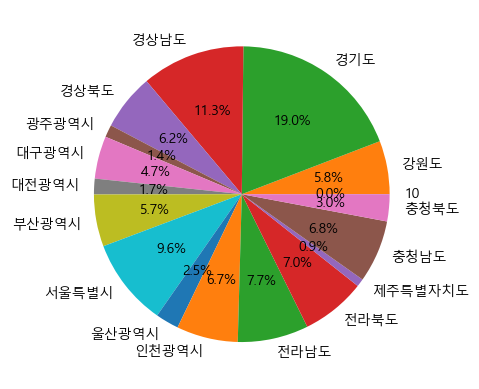

In [387]:
plt.pie(values, labels = districts, autopct = '%.1f%%')
plt.show()

## 2. 데이터 정제

### 2-1. 간단한 데이터 전처리

In [388]:
# 원본데이터로에서 읽기 가능한 형태로 데이터처리를 하세요. (열이름 변경, 형변환, 피봇, 분석용 데이터 셋 생성 등)

In [389]:
sle.loc[sle['시도명'] == '10', '시도명'] = '강원도'

In [390]:
value_counts = sle['시도명'].value_counts().sort_index()
districts = value_counts.index.tolist()
values = value_counts.values
districts

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [391]:
sle['설치연도'].value_counts().sort_index()

설치연도
2002.0       3
2003.0       5
2004.0      21
2005.0      97
2006.0     146
2007.0     197
2008.0     267
2009.0     315
2010.0     496
2011.0     566
2012.0     284
2013.0     860
2014.0     959
2015.0     999
2016.0    1511
2017.0    1964
2018.0    2157
2019.0    2441
2020.0    4192
2021.0    6530
2022.0    2235
Name: count, dtype: int64

In [392]:
sle = sle[['시도명', '시군구명', '도로종류', '도로노선명', '제한속도', '설치연도']]
sle

,시도명,시군구명,도로종류,도로노선명,제한속도,설치연도
0,경상북도,상주시,일반국도,영남제일로,60,NaN
1,전라남도,곡성군,군도,창정리,30,2020.0
2,전라남도,곡성군,군도,읍내리,30,2020.0
3,전라남도,곡성군,군도,석곡리,30,2020.0
4,전라남도,곡성군,군도,죽림리,30,2020.0
...,...,...,...,...,...,...
30880,경기도,여주시,지방도,여주남로,50,2018.0
30881,경기도,여주시,지방도,여주남로,70,2018.0
30882,경기도,여주시,일반국도,경충대로,60,2018.0
30883,경기도,여주시,지방도,설가로,60,2018.0


### 2-2. 데이터 클리닝

In [393]:
# 결측치, 중복값, 이상치 처리등의 작업을 진행하세요

* 결측치

    - 결측치 열 확인

In [394]:
missing_values = sle.isnull().any()  
column_missing_values = missing_values[ missing_values == True ]
column_missing_values

설치연도    True
dtype: bool

In [395]:
# df.isnull().any(axis=1)

In [396]:
missing_values = sle.isnull().any()  
column_missing_values = missing_values[ missing_values == True ]
column_missing_values

설치연도    True
dtype: bool

* 결측치 보정

In [397]:
# df['나이'] = df['나이'].fillna(0)

In [398]:
sle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30885 entries, 0 to 30884
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     30885 non-null  object 
 1   시군구명    30885 non-null  object 
 2   도로종류    30885 non-null  object 
 3   도로노선명   30885 non-null  object 
 4   제한속도    30885 non-null  int64  
 5   설치연도    26245 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [399]:
sle['설치연도'].fillna(99, inplace = True)
sle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30885 entries, 0 to 30884
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     30885 non-null  object 
 1   시군구명    30885 non-null  object 
 2   도로종류    30885 non-null  object 
 3   도로노선명   30885 non-null  object 
 4   제한속도    30885 non-null  int64  
 5   설치연도    30885 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_13224\2608709228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sle['설치연도'].fillna(99, inplace = True)


In [400]:
sle['설치연도'] = sle['설치연도'].astype('object')
sle['설치연도'] == '미확인'

C:\Users\user\AppData\Local\Temp\ipykernel_13224\1119031857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sle['설치연도'] = sle['설치연도'].astype('object')


0        False
1        False
2        False
3        False
4        False
         ...  
30880    False
30881    False
30882    False
30883    False
30884    False
Name: 설치연도, Length: 30885, dtype: bool

In [401]:
sle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30885 entries, 0 to 30884
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     30885 non-null  object
 1   시군구명    30885 non-null  object
 2   도로종류    30885 non-null  object
 3   도로노선명   30885 non-null  object
 4   제한속도    30885 non-null  int64 
 5   설치연도    30885 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [402]:
sle.loc[sle['제한속도'] == 0, ['제한속도']] = -1
sle[sle['제한속도'] == -1]

,시도명,시군구명,도로종류,도로노선명,제한속도,설치연도
76,부산광역시,서구,구도,보수대로,-1,2021.0
77,부산광역시,서구,구도,부용로,-1,2021.0
78,부산광역시,서구,구도,천해로,-1,2021.0
79,부산광역시,서구,구도,보수대로,-1,2021.0
80,서울특별시,광진구,구도,영화사로,-1,2020.0
...,...,...,...,...,...,...
30851,경기도,여주시,시도,청심로,-1,2015.0
30852,경기도,여주시,시도,교동로,-1,2016.0
30853,경기도,여주시,시도,교동로,-1,2016.0
30854,경기도,여주시,시도,도예로,-1,2017.0


In [354]:
# df = df.fillna(0)

* 중복값 삭제 (필요시)

In [ ]:
# df[df.duplicated(keep=False)]

In [ ]:
# df.drop_duplicates(inplace=True)

## 3. 추가데이터 분석

### 3.1. 데이터 정제후 데이터스키마 재확인

* 1-2 작업을 다시 해보세요.

In [404]:
daegu = sle[sle['시도명'] == '대구광역시']
daegu_sle = daegu[['시군구명', '도로노선명', '도로종류', '제한속도', '설치연도']]
daegu_sle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 3507 to 20526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구명    1439 non-null   object
 1   도로노선명   1439 non-null   object
 2   도로종류    1439 non-null   object
 3   제한속도    1439 non-null   int64 
 4   설치연도    1439 non-null   object
dtypes: int64(1), object(4)
memory usage: 67.5+ KB


### 3.2 데이터 기초정보 정보 확인

* 최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값, 결측치, 이상치 등의 정보를 재확인해 보세요

In [405]:
daegu_sle['시군구명'].unique()

array(['달서', '수성', '성서', '서부', '남부', '북부', '동부', '달성', '중부', '강북', '남구',
       '달서구', '달성군', '북구', '중구', '동구', '서구', '수성구', '달성구'], dtype=object)

In [406]:
daegu_sle['도로종류'].unique()

array(['시도', '일반국도', '지방도', '구도', '군도'], dtype=object)

In [407]:
daegu_sle['제한속도'].unique()

array([50, 30, 60, 40, 70, 80, -1], dtype=int64)

In [408]:
daegu_sle['설치연도'].unique()

array([2020.0, 2021.0, 2019.0, 2018.0, 2017.0, 2016.0, 2014.0, 2015.0,
       2013.0, 2011.0, 2010.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
       2012.0, 2022.0], dtype=object)

In [409]:
daegu_sle['제한속도'].describe()

count    1439.000000
mean       41.865184
std        21.309362
min        -1.000000
25%        30.000000
50%        50.000000
75%        60.000000
max        80.000000
Name: 제한속도, dtype: float64

### 3.3 시각화를 통한 데이터이해 심화

* 데이터의 성격에 따라 이해도를 올리기 위해 시각화가 필요한 데이터차트를 만들어 보세요.  
  (Seaborn 추천: 페어플롯, 막대차트, 파이차트, 라인차트, 히스토그램등..)

In [412]:
daegu_sle.loc[daegu_sle['시군구명'] == '달서', '시군구명'] = '달서구'
daegu_sle.loc[daegu_sle['시군구명'] == '수성', '시군구명'] = '수성구'
daegu_sle.loc[daegu_sle['시군구명'] == '성서', '시군구명'] = '서구'
daegu_sle.loc[daegu_sle['시군구명'] == '서부', '시군구명'] = '서구'
daegu_sle.loc[daegu_sle['시군구명'] == '남부', '시군구명'] = '남구'
daegu_sle.loc[daegu_sle['시군구명'] == '북부', '시군구명'] = '북구'
daegu_sle.loc[daegu_sle['시군구명'] == '동부', '시군구명'] = '동구'
daegu_sle.loc[daegu_sle['시군구명'] == '달성', '시군구명'] = '달성군'
daegu_sle.loc[daegu_sle['시군구명'] == '중부', '시군구명'] = '중구'
daegu_sle.loc[daegu_sle['시군구명'] == '강북', '시군구명'] = '북구'
daegu_sle.loc[daegu_sle['시군구명'] == '달성구', '시군구명'] = '달성군'
daegu_sle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 3507 to 20526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구명    1439 non-null   object
 1   도로노선명   1439 non-null   object
 2   도로종류    1439 non-null   object
 3   제한속도    1439 non-null   int64 
 4   설치연도    1439 non-null   object
dtypes: int64(1), object(4)
memory usage: 67.5+ KB


In [413]:
daegu_sle = daegu_sle.loc[daegu_sle['제한속도'] > 0]
daegu_sle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 3507 to 20526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구명    1233 non-null   object
 1   도로노선명   1233 non-null   object
 2   도로종류    1233 non-null   object
 3   제한속도    1233 non-null   int64 
 4   설치연도    1233 non-null   object
dtypes: int64(1), object(4)
memory usage: 57.8+ KB


In [464]:
daegu_value_counts = daegu_sle['시군구명'].value_counts().sort_index()
daegu_districts = daegu_value_counts.index.tolist()
daegu_values = daegu_value_counts.values
daegu_value_counts

시군구명
남구      54
달서구    221
달성군    271
동구     144
북구     228
서구     129
수성구    141
중구      45
Name: count, dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


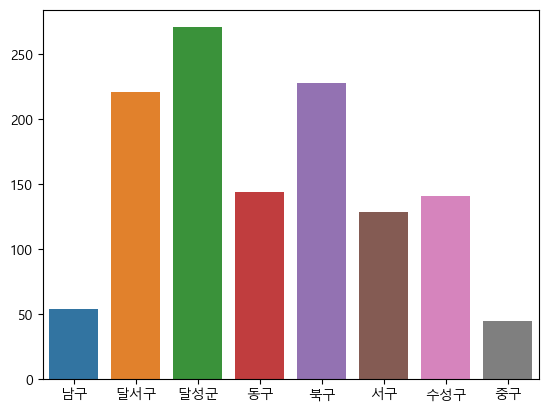

In [450]:
sns.barplot(data = daegu_sle, x = daegu_districts, y = daegu_values)
plt.show()

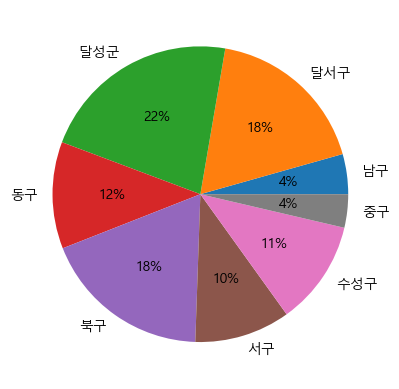

In [445]:
plt.pie(daegu_values, labels = daegu_districts, autopct = '%.f%%')
plt.show()

In [466]:
speed_value_counts = daegu_sle['제한속도'].value_counts().sort_index()
daegu_speeds = speed_value_counts.index.tolist()
speed_values = speed_value_counts.values
speed_value_counts

제한속도
30    273
40    115
50    441
60    318
70     35
80     51
Name: count, dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='도로종류', ylabel='Count'>

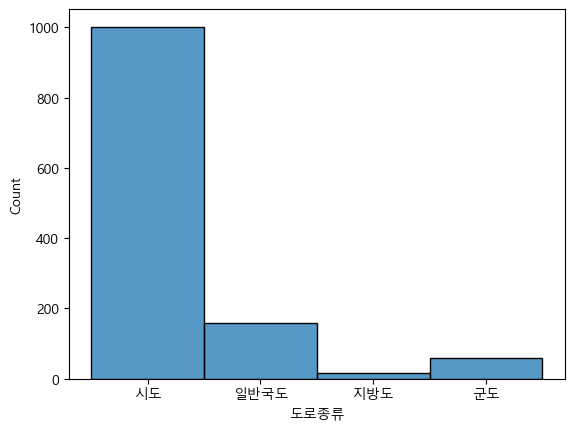

In [495]:
sns.histplot(data = daegu_sle, x = '도로종류')

<Axes: xlabel='시군구명', ylabel='제한속도'>

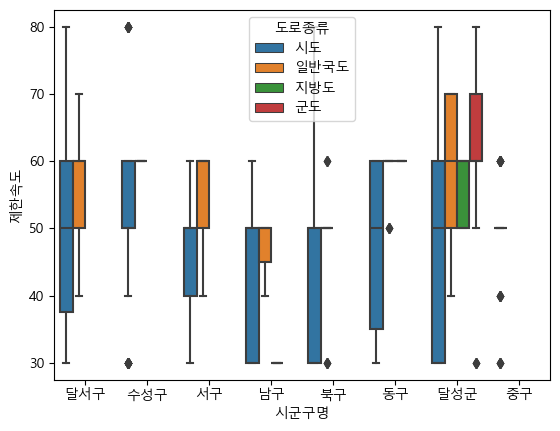

In [481]:
sns.boxplot(data = daegu_sle, x = '시군구명', y = '제한속도', hue = '도로종류')

<Axes: xlabel='도로종류', ylabel='제한속도'>

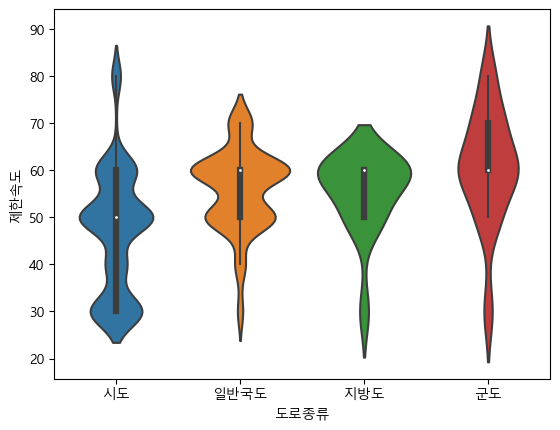

In [478]:
sns.violinplot(data = daegu_sle, x = '도로종류', y = '제한속도')

In [463]:
road_value_counts = daegu_sle['도로종류'].value_counts().sort_index()
daegu_roads = road_value_counts.index.tolist()
daegu_road_values = road_value_counts.values
road_value_counts

도로종류
군도        58
시도      1002
일반국도     158
지방도       15
Name: count, dtype: int64

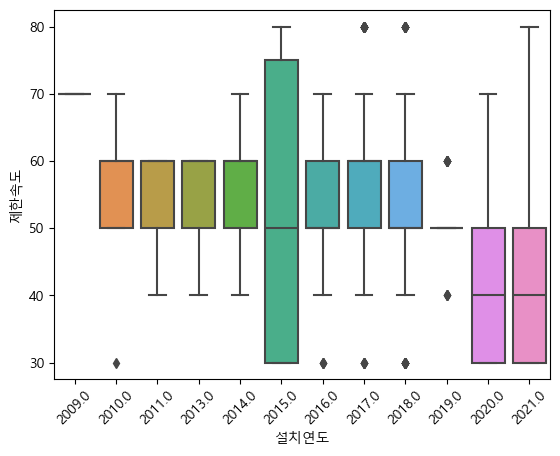

In [438]:
sns.boxplot(data = daegu_sle, x = '설치연도', y = '제한속도')
plt.xticks(rotation = 45)
plt.show()

### 3.4 데이터 분석 결과도출

* 데이터 분석을 통해 얻은 새로운 지식, 인사이트를 정리하세요.
* 새로운 지식 및 인사이트 별 비지니스 전략을 도출할 수 있으면 정리해 보세요

### 인사이트 도출

* 대구 외곽지역으로 나갈수록 단속 카메라가 더 많이 설치되어있다.
* 대구 중심부로 들어올수록 제한속도가 낮은 구간이 더 많다.
* 대구 지역 내 50 ~ 60km/h 제한인 도로가 가장 보편적이다.
* 2020년부터 어린이 보호구역 제한속도인 30 ~ 40 km/h 구간 설치가 많아진 것을 확인할 수 있다.
* 군도는 달성군에만 존재한다.